#### Code for generating Supplementary Figure 2c

In [58]:
# PACKAGES
import matplotlib.pyplot as plt
import itertools
import numpy as np
import os
import scipy
import pandas as pd
%matplotlib inline
import seaborn as  sns
from itertools import chain, combinations

In [60]:
cmap=plt.cm.tab20
cmaplist = [cmap(i) for i in range(cmap.N)]
light_phenotype_colors = {"cerad": cmaplist[3], "plaques": cmaplist[7],  "abeta": cmaplist[11], 
                    "braak": cmaplist[5], "tangles": cmaplist[1], "tau": cmaplist[9]}

phenotype_colors = {"cerad": cmaplist[2], "plaques": cmaplist[6],  "abeta": cmaplist[10], 
                    "braak": cmaplist[4], "tangles": cmaplist[0], "tau": cmaplist[8]}

In [61]:
architectures = [
    '500-100-b-50-10',
    '500-b-100-50-10',
    '500-100-50-b-10',
    '500-b-50-10',
    '500-100-b-100-50-10',
    '500-250-100-b-50-10'
]
architecture_names = [
    'MD-AD',
    'Split Early',
    'Split Late',
    'Remove Last Shared Layer',
    'Add Individual Layer',
    'Add Shared Layer'
]

In [62]:
data_frames = [pd.read_csv('../../Pipeline_Outputs_Submitted/other_architectures/models/{}/finalPerformance.csv'.format(arch)) for arch in architectures]

In [63]:
for i, df in enumerate(data_frames):
    if i > 0:
        data_frames[i] = data_frames[i] - data_frames[0]
    data_frames[i]['architecture'] = architecture_names[i]

In [65]:
phenotype_names = ['ABETA', 'TAU', 'PLAQUES', 'TANGLES', 'CERAD', 'BRAAK']
total_df = pd.concat(data_frames[1:])
total_df = total_df[[phenotype_name + '_normalized' for phenotype_name in phenotype_names] + ['architecture']]
total_df.rename({key + '_normalized': key.lower() for key in phenotype_names}, axis=1, inplace=True)
melted_df = pd.melt(total_df, id_vars=['architecture'], var_name='phenotype', value_name='performance')

cerad
plaques
abeta
braak
tangles
tau


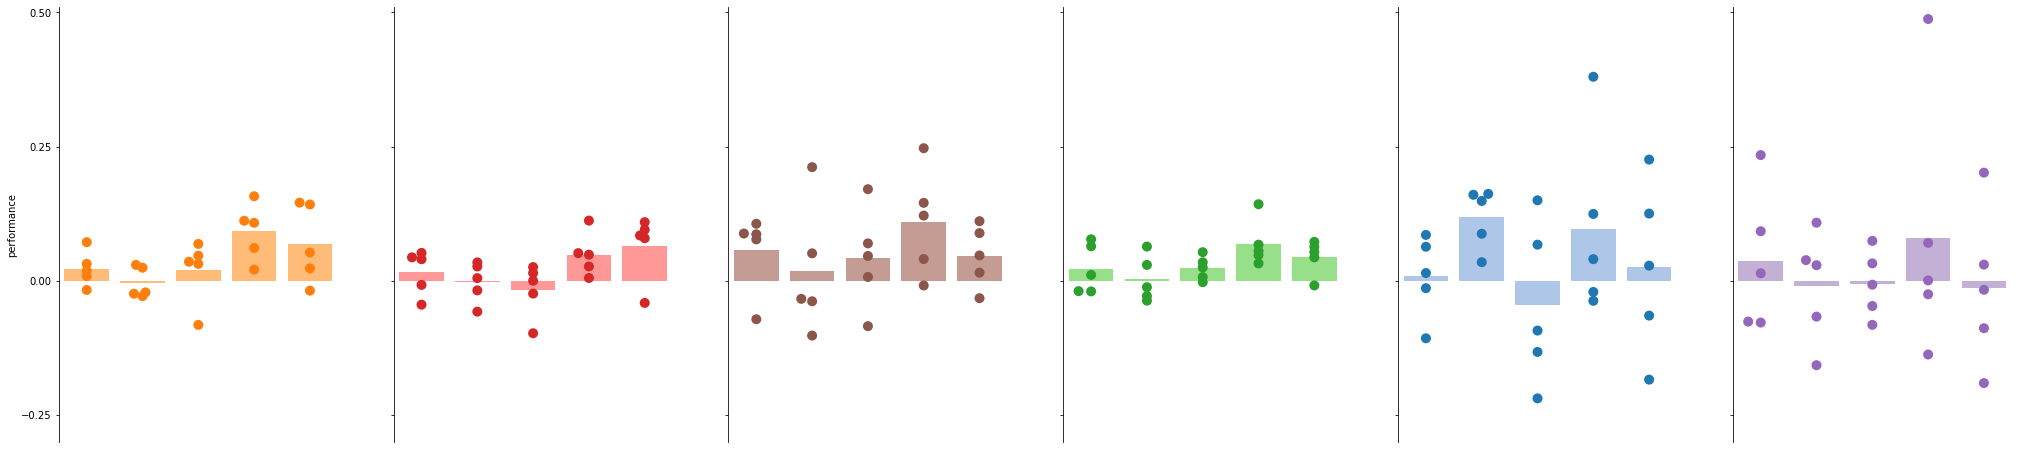

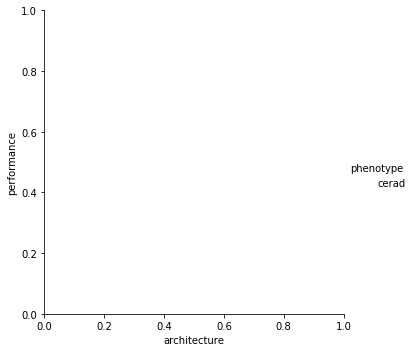

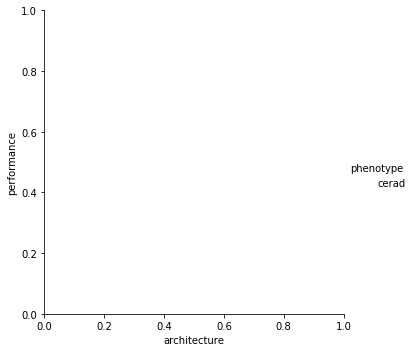

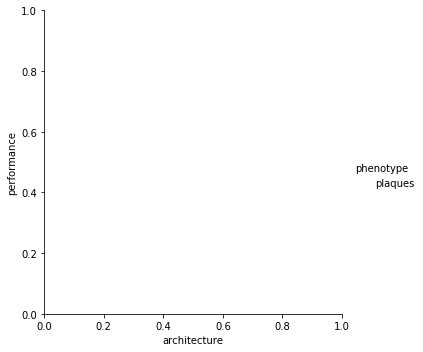

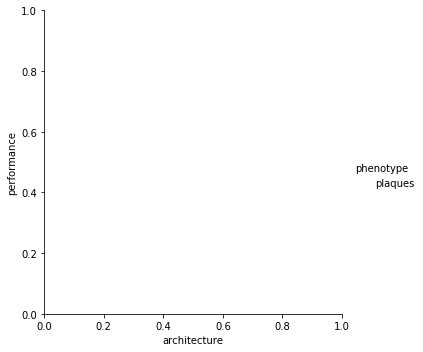

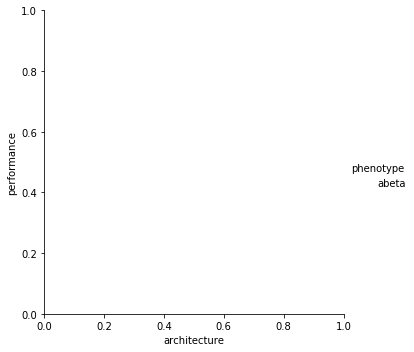

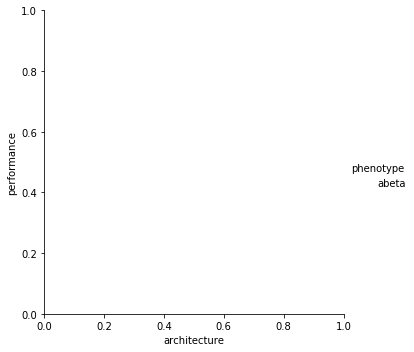

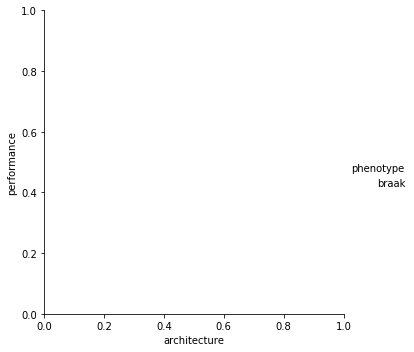

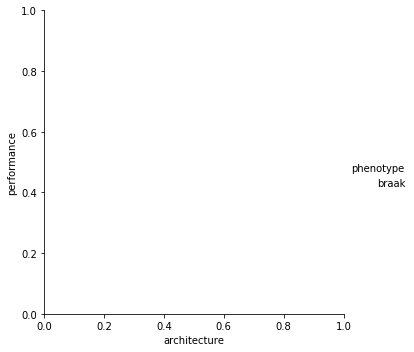

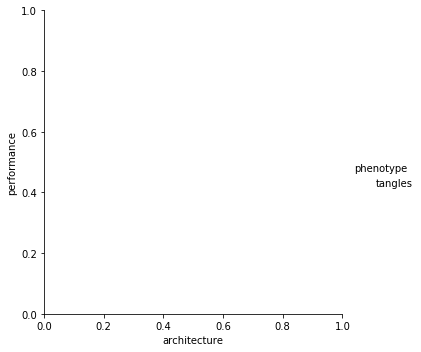

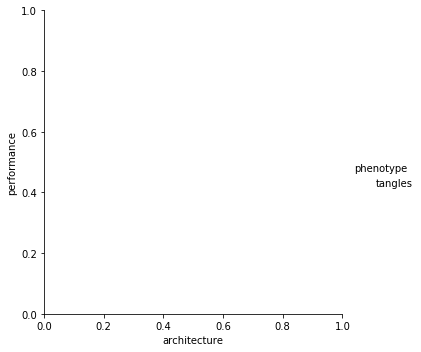

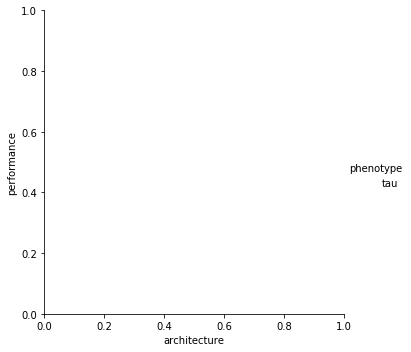

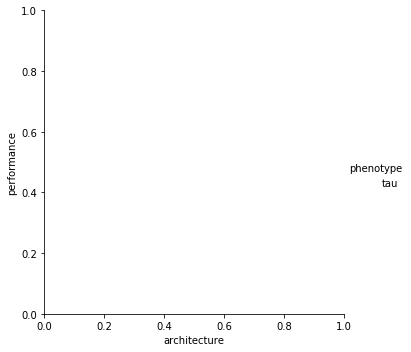

In [66]:
f, axes = plt.subplots(1,6,figsize=(35,8))


for i,phen in enumerate(["cerad", "plaques", "abeta", "braak", "tangles", "tau"]):
    print(phen)
    
    ax=axes[i]

    tmp = melted_df[melted_df["phenotype"]==phen]
    
    g= sns.catplot(kind="bar", data=tmp, x="architecture", y="performance", 
                order=architecture_names, palette=light_phenotype_colors,  hue="phenotype",
                  ax=ax, ci=None, alpha=1, dodge=False, saturation=1)

    g = sns.catplot(data=tmp, x="architecture", y="performance", hue="phenotype",
                order=architecture_names, palette=phenotype_colors, kind="swarm", ax=ax, s=10)


    ax.grid(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.get_legend().remove()

    ax.set_facecolor("None")

    ax.yaxis.set_major_locator(plt.MaxNLocator(4))

    ax.tick_params(top=False, bottom=False, left=True, right=False, labelleft=True, labelbottom=True, color="#000000")
    
    ax.set_xlim(.5)
    ax.set_ylim(-.3, .51)

    ax.set_xticklabels("")
    if i>0:
        ax.set_yticklabels("")
        ax.set_ylabel("")

    ax.axes.get_xaxis().set_visible(False)
    
    